In [1]:
# check disc file include() in DoubleUAVs_module.jl !
# This notebook requires "mid3"

push!(LOAD_PATH, "../src")
using CAS_QMDP

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/7a295fdb4a14d2a7013b3e7142374461fb75f5de-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/7a295fdb4a14d2a7013b3e7142374461fb75f5de-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

(div { className="field" }
    (button { attributes=Dict{Any,Any}(Pair{Any,Any}("data-bind", "click : function () {this.clicks(this.clicks()+1)}")) className="button is-primary" style=Dict{String,Any}() }
    "Save Policy Slice"))

(div { className="field" }
    (input { attributes=Dict{Any,Any}(Pair{Any,Any}(:type, "text"),Pair{Any,Any}(Symbol("data-bind"), "value: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}")) placeholder="Figure Name" className="input " style=Dict{Any,Any}() }))

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_06", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-842d9f8f-3af1-446d-baec-7c04bb353ca9", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["p"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 360.0),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 30.0),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, 0.0)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_05", 180.0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/shengli/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/shengli/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/shengli/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/shengli/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":180.0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return this.value().toPrecision(6);},this)]\n        [this[\"changes\"].subscribe((function (val){!(t
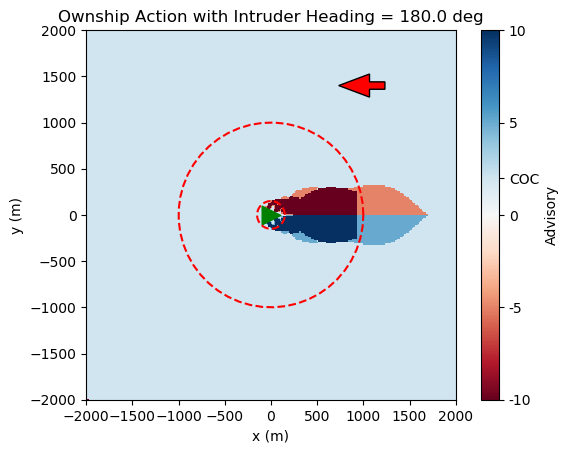
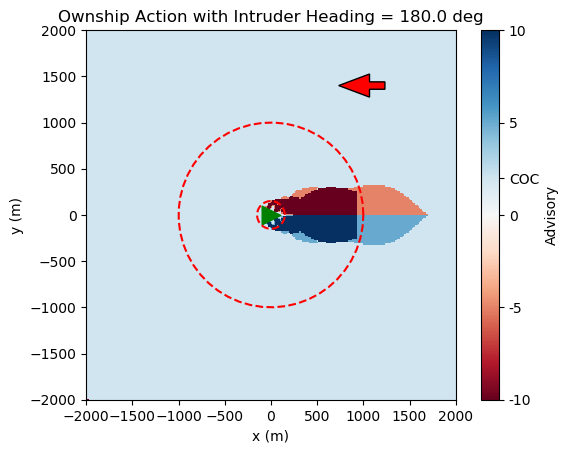

In [2]:
alphas = 
    load_alphas("../policies/test_mid3.jld");
viz_policy(alphas)


(div { className="field" }
    (button { attributes=Dict{Any,Any}(Pair{Any,Any}("data-bind", "click : function () {this.clicks(this.clicks()+1)}")) className="button is-primary" style=Dict{String,Any}() }
    "Save Policy Slice"))

(div { className="field" }
    (input { attributes=Dict{Any,Any}(Pair{Any,Any}(:type, "text"),Pair{Any,Any}(Symbol("data-bind"), "value: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}")) placeholder="Figure Name" className="input " style=Dict{Any,Any}() }))

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_22", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-e3840fcc-9670-433b-bccb-f718b4536fd1", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["int_1_x"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 2000),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 250),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, -2000)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_21", 0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/shengli/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/shengli/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/shengli/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/shengli/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return this.value();},this)]\n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[
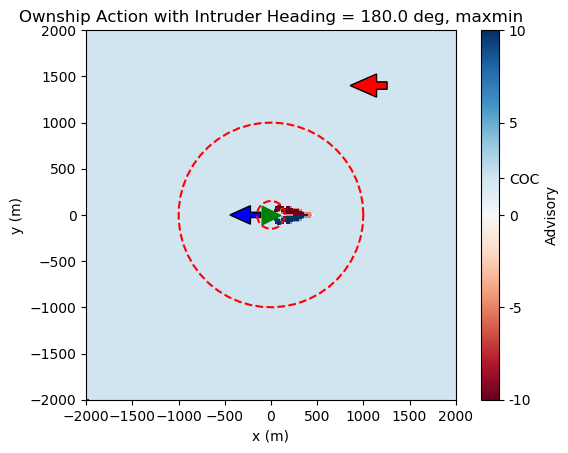
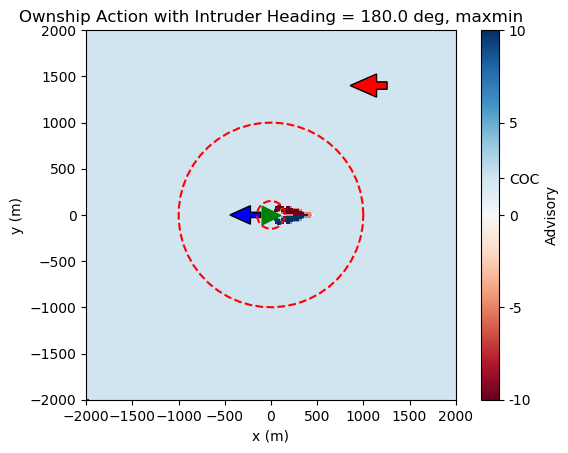

In [3]:
alphas = 
    load_alphas("../policies/test_mid3.jld");
viz_policy_multi(alphas, method=:maxmin)


(div { className="field" }
    (button { attributes=Dict{Any,Any}(Pair{Any,Any}("data-bind", "click : function () {this.clicks(this.clicks()+1)}")) className="button is-primary" style=Dict{String,Any}() }
    "Save Policy Slice"))

(div { className="field" }
    (input { attributes=Dict{Any,Any}(Pair{Any,Any}(:type, "text"),Pair{Any,Any}(Symbol("data-bind"), "value: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}")) placeholder="Figure Name" className="input " style=Dict{Any,Any}() }))

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_281", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-16eb1990-38e1-4f43-9e96-24795bffc25d", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["p"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 360.0),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 30.0),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, 0.0)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_280", 180.0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/shengli/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/shengli/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/shengli/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/shengli/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":180.0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return this.value().toPrecision(6);},this)]\n        [this[\"changes\"].subscribe((function (val){!
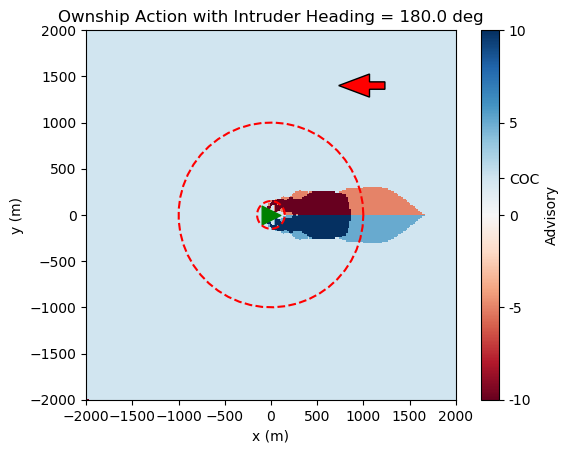
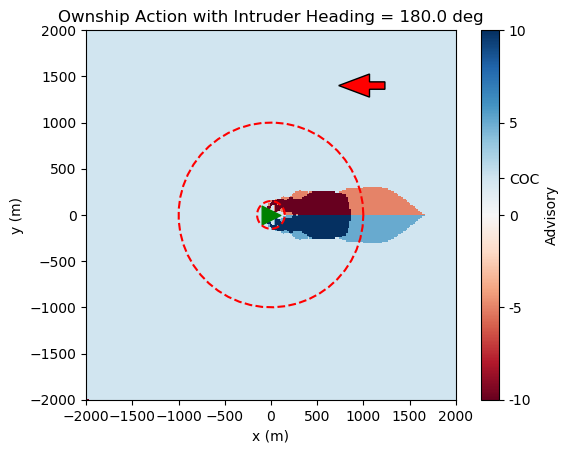

In [75]:
alphas = 
    load_alphas("../policies/mid3_maxdist_2km_nmac_150m_Discount_0.95_ActWeight_0.5_IfSample_false_PenAction_3.0_PenConflict_50.0_PenCloseness_500.0_PenNmac_7000.0_Sigma_v_5.0_alert_5.0_theta_3.0_phi_7.0_coc_3.0.jld");
viz_policy(alphas)
